# Proyecto 1 - Security Data Science

In [279]:
#Librerias que se van a utilizar. 
import pandas as pd
import numpy as np
import  re
import neattext as nt
import unicodedata

import matplotlib.pyplot as plt
from collections import Counter
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics, model_selection, tree
from matplotlib.ticker import StrMethodFormatter
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as smm

import matplotlib.pyplot as plt
import numpy as np

## Analisis Exploratorio


---



In [2]:
#Carga de datos
df1 = pd.read_csv('datasets/dataset-part1.csv')
df2 = pd.read_csv('datasets/dataset-part2.csv')
df3 = pd.read_csv('datasets/dataset-part3.csv')
df4 = pd.read_csv('datasets/dataset-part4.csv')

In [3]:
#Analisis Exploratorio
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570666 entries, 0 to 3570665
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

In [4]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570666 entries, 0 to 3570665
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,40,0,1616660040,120,339,0,1616660040010,1616660040,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,",",0,1616660040,120,0,0,1616660040068,1616660040,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,104,0,1616660040,120,44725,44,1616660040114,1616660040,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,",",0,1616660040,120,0,0,1616660040122,1616660040,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,40,0,1616660040,120,1114,1,1616660040184,1616660040,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow


In [5]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8637207 entries, 0 to 8637206
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,",,48,,,,,,,,,,40,,,,,,,,,,40,,,,,,,,,,40,,,,,,...",0,1618174987,120,104116914,104116,1618175092090,1618175092,...,1460,1460,0,0,0,164,TLS,1,77251491,Normal flow
1,1,0,",,,,,,,,,,,",0,1618175067,120,9529030,9529,1618175077010,1618175077,...,0,0,0,0,0,0,STUN.Messenger,1,77251492,Normal flow
2,1,0,",,,,,,,,,,,",0,1618175067,120,9529169,9529,1618175077010,1618175077,...,0,0,0,0,192,0,ICMP,1,77251493,Normal flow
3,1,0,",",0,1618175077,120,0,0,1618175077021,1618175077,...,0,0,0,0,72,0,ICMP,1,77251494,Normal flow
4,1,0,",",0,1618175077,120,0,0,1618175077069,1618175077,...,0,0,0,0,0,0,Unknown,1,77251495,Normal flow


In [6]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330692 entries, 0 to 1330691
Data columns (total 50 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   BIFLOW_DIRECTION            1330692 non-null  int64 
 1   DIRECTION                   1330692 non-null  int64 
 2   DST_TO_SRC_SECOND_BYTES     1330692 non-null  object
 3   FIREWALL_EVENT              1330692 non-null  int64 
 4   FIRST_SWITCHED              1330692 non-null  int64 
 5   FLOW_ACTIVE_TIMEOUT         1330692 non-null  int64 
 6   FLOW_DURATION_MICROSECONDS  1330692 non-null  int64 
 7   FLOW_DURATION_MILLISECONDS  1330692 non-null  int64 
 8   FLOW_END_MILLISECONDS       1330692 non-null  int64 
 9   FLOW_END_SEC                1330692 non-null  int64 
 10  FLOW_ID                     1330692 non-null  int64 
 11  FLOW_INACTIVE_TIMEOUT       1330692 non-null  int64 
 12  FLOW_START_MILLISECONDS     1330692 non-null  int64 
 13  FLOW_START_S

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,138,0,1622174400,120,682,0,1622174400001,1622174400,...,0,0,0,0,0,0,DNS,1,1365973,Normal flow
1,1,0,75,0,1622174400,120,579,0,1622174400001,1622174400,...,0,0,0,0,0,0,DNS,1,1365974,Normal flow
2,1,0,40,0,1622174400,120,213,0,1622174400053,1622174400,...,0,0,0,0,40,40,Unknown,1,1365976,Normal flow
3,1,0,166,0,1622174400,120,257,0,1622174400109,1622174400,...,0,0,0,0,0,0,DNS,1,1365978,Normal flow
4,1,0,",",0,1622174400,120,0,0,1622174400114,1622174400,...,0,0,0,0,196,0,ICMP,1,1365979,Normal flow


In [7]:
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26725246 entries, 0 to 26725245
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,138,0,1622433600,120,857,0,1622433600002,1622433600,...,0,0,0,0,0,0,DNS,1,7062121,Normal flow
1,1,0,75,0,1622433600,120,924,0,1622433600002,1622433600,...,0,0,0,0,0,0,DNS,1,7062122,Normal flow
2,1,0,",",0,1622433600,120,0,0,1622433600007,1622433600,...,0,0,0,0,40,0,Unknown,1,7062123,Normal flow
3,1,0,166,0,1622433600,120,513,0,1622433600090,1622433600,...,0,0,0,0,0,0,DNS,1,7062127,Normal flow
4,1,0,52,0,1622433600,120,26595,26,1622433600097,1622433600,...,0,0,0,0,0,0,TLS.Google,1,7062128,Normal flow


## Pre – procesamiento

---

In [8]:
# Juntar Dataframes
df = pd.concat([df1, df2, df3, df4])

In [9]:
del df1, df2, df3, df4

In [10]:
# Validar el tamaño del df
df.shape

(40263811, 50)

In [18]:
# Sample df
#del df1, df2, df3, df4
df_sample_1 = df.sample(frac=0.005) # esto es solo para pruebas

In [13]:
# ! TODO: Crear un sample mas grande 30% maybe
df_sample_1.shape

(201319, 50)

In [15]:
# Muestra cuantos Labels distintos hay en el dataset

df_sample_1['LABEL'].unique()

array(['Normal flow', 'SYN Scan - aggressive',
       'Denial of Service Slowloris', 'Denial of Service R-U-Dead-Yet',
       'UDP Scan', 'NULL Scan', 'FIN Scan', 'XMAS Scan'], dtype=object)

In [14]:
# Contar proporcion segun Label

df_sample_1['LABEL'].value_counts()

Normal flow                       169822
SYN Scan - aggressive              12274
Denial of Service R-U-Dead-Yet     11452
Denial of Service Slowloris         4208
UDP Scan                            3456
NULL Scan                             38
XMAS Scan                             35
FIN Scan                              34
Name: LABEL, dtype: int64

In [22]:
# Eliminar Labels no necesarios (Ruido)

df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'UDP Scan'].index, inplace = True)
df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'NULL Scan'].index, inplace = True)
df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'XMAS Scan'].index, inplace = True)
df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'FIN Scan'].index, inplace = True)

df_sample_1['LABEL'].value_counts()

Normal flow                       169676
SYN Scan - aggressive              12513
Denial of Service R-U-Dead-Yet     11121
Denial of Service Slowloris         4408
Name: LABEL, dtype: int64

In [23]:
# Es como guardar el sample

df_sample_1.to_csv('datasets/sample.csv', index=False)

## Selección de características

---

In [ ]:
#Selección de características

In [29]:
# Eliminar columnas que no aportan

df_sample_1.drop(columns=['BIFLOW_DIRECTION', 'DIRECTION', 'DST_TO_SRC_SECOND_BYTES', 'FIREWALL_EVENT', 'FLOW_ACTIVE_TIMEOUT', 'FLOW_ID', 'FLOW_INACTIVE_TIMEOUT', 'FRAME_LENGTH', 'IPV4_DST_ADDR', 'IPV4_SRC_ADDR', 'MAX_IP_PKT_LEN', 'MIN_IP_PKT_LEN', 'OOORDER_IN_PKTS', 'OOORDER_OUT_PKTS', 'SAMPLING_INTERVAL'], axis=1)

df_sample_1

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
11181184,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,Unknown,18243429,Normal flow
8271472,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,DNS,85522963,Normal flow
5424560,1618231864,110678246,110678,1618231975092,1618231975,1618231864413,1618231864,1106,13,80,...,114,0,0,0,0,0,0,HTTP,82676051,Denial of Service R-U-Dead-Yet
17451589,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,Unknown,24513834,Normal flow
5359829,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,BitTorrent,82611320,Normal flow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16516066,1622441333,251,0,1622441333368,1622441333,1622441333368,1622441333,40,1,42800,...,0,0,0,0,0,0,0,Unknown,23578311,Normal flow
4819565,1618230202,110264527,110264,1618230313157,1618230313,1618230202893,1618230202,1180,14,80,...,114,0,0,0,0,0,0,HTTP,82071056,Denial of Service R-U-Dead-Yet
10878526,1622440363,285,0,1622440363294,1622440363,1622440363293,1622440363,40,1,9603,...,0,0,0,0,0,0,0,Unknown,17940771,Normal flow
8236400,1622438559,260,0,1622438559253,1622438559,1622438559253,1622438559,40,1,35915,...,0,0,0,0,0,0,0,Unknown,15298645,Normal flow


In [30]:
df_sample_1.groupby('L7_PROTO_NAME').filter(lambda x : len(x)>1000)

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
11181184,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,Unknown,18243429,Normal flow
8271472,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,DNS,85522963,Normal flow
5424560,1618231864,110678246,110678,1618231975092,1618231975,1618231864413,1618231864,1106,13,80,...,114,0,0,0,0,0,0,HTTP,82676051,Denial of Service R-U-Dead-Yet
17451589,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,Unknown,24513834,Normal flow
5359829,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,BitTorrent,82611320,Normal flow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16516066,1622441333,251,0,1622441333368,1622441333,1622441333368,1622441333,40,1,42800,...,0,0,0,0,0,0,0,Unknown,23578311,Normal flow
4819565,1618230202,110264527,110264,1618230313157,1618230313,1618230202893,1618230202,1180,14,80,...,114,0,0,0,0,0,0,HTTP,82071056,Denial of Service R-U-Dead-Yet
10878526,1622440363,285,0,1622440363294,1622440363,1622440363293,1622440363,40,1,9603,...,0,0,0,0,0,0,0,Unknown,17940771,Normal flow
8236400,1622438559,260,0,1622438559253,1622438559,1622438559253,1622438559,40,1,35915,...,0,0,0,0,0,0,0,Unknown,15298645,Normal flow


In [31]:
# Guardamos el group by
df_sample_1.to_csv('datasets/sample_groupby.csv', index=False)

In [32]:
df_sample_1['L7_PROTO_NAME'].value_counts()

Unknown          145971
HTTP              16147
DNS                8163
TLS                5041
DNS.Google         3289
                  ...  
DNS.TikTok            1
DNS.PlayStore         1
DNS.eBay              1
DNS.Snapchat          1
DNS.DoH_DoT           1
Name: L7_PROTO_NAME, Length: 269, dtype: int64

In [53]:
# Codificar columnas

for index, row in df_sample_1.iterrows():
    if row['LABEL'] == 'Normal flow':
        df_sample_1.loc[index,'LABEL']= 1
    elif row['LABEL'] == 'SYN Scan - aggressive':
        df_sample_1.loc[index,'LABEL'] = 2
    elif row['LABEL'] == 'Denial of Service R-U-Dead-Yet':
        df_sample_1.loc[index,'LABEL'] = 3
    elif row['LABEL'] == 'Denial of Service Slowloris':
        df_sample_1.loc[index,'LABEL'] = 4

    
df_sample_1.head(5)

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
11181184,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,Unknown,18243429,1
8271472,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,DNS,85522963,1
5424560,1618231864,110678246,110678,1618231975092,1618231975,1618231864413,1618231864,1106,13,80,...,114,0,0,0,0,0,0,HTTP,82676051,3
17451589,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,Unknown,24513834,1
5359829,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,BitTorrent,82611320,1


In [5]:
df_sample_1 = pd.read_csv('sample_lable.csv')

In [18]:
uniqueValues = df_sample_1['L7_PROTO_NAME'].unique()
uniqueValues = uniqueValues.tolist()
uniqueValues

array(['Unknown', 'DNS', 'HTTP', 'BitTorrent', 'DNS.Cloudflare',
       'DNS.Google', 'TLS.Skype', 'ICMP', 'TLS.Google', 'SSH', 'TLS',
       'Telnet', 'DNS.Microsoft', 'QUIC.Google', 'ICMP.Amazon',
       'STUN.Messenger', 'TLS.Dropbox', 'DNS.Dropbox', 'QUIC.YouTube',
       'HTTP_Proxy', 'TLS.Microsoft365', 'HTTP.Microsoft', 'DNS.Yahoo',
       'TLS.Amazon', 'DNS.Amazon', 'DNS.Skype', 'DNS.Facebook', 'IMAP',
       'TLS.Twitter', 'QUIC.Cloudflare', 'DNS.Telegram', 'STUN.SkypeCall',
       'DNS.MS_OneDrive', 'NFS', 'TLS.Cloudflare', 'DNS.eBay',
       'DNS.ApplePush', 'DNS.Apple', 'ICMP.Google', 'MQTT', 'Google',
       'DNS.GoogleServices', 'NTP', 'STUN.GoogleHangoutDuo',
       'DNS.UbuntuONE', 'DNS.OpenDNS', 'SNMP', 'TLS.Spotify',
       'TLS.Microsoft', 'Apple', 'TLS.Facebook', 'TLS.Yahoo',
       'DNS.YouTube', 'HTTP.Google', 'TLS.UbuntuONE', 'TeamViewer',
       'QUIC.GoogleDrive', 'DNS.AnyDesk', 'MsSQL-TDS', 'DNS.Teams',
       'NTP.Cloudflare', 'TLS.Telegram', 'RemoteScan', 'T

In [26]:
for index, row in df_sample_1.iterrows():
    if row['L7_PROTO_NAME'] in uniqueValues:
        df_sample_1.loc[index,'L7_PROTO_NAME']= uniqueValues.index(row['L7_PROTO_NAME'])
df_sample_1

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
0,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,0,18243429,1
1,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,1,85522963,1
2,1618231864,110678246,110678,1618231975092,1618231975,1618231864413,1618231864,1106,13,80,...,114,0,0,0,0,0,0,2,82676051,3
3,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,0,24513834,1
4,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,3,82611320,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197713,1622441333,251,0,1622441333368,1622441333,1622441333368,1622441333,40,1,42800,...,0,0,0,0,0,0,0,0,23578311,1
197714,1618230202,110264527,110264,1618230313157,1618230313,1618230202893,1618230202,1180,14,80,...,114,0,0,0,0,0,0,2,82071056,3
197715,1622440363,285,0,1622440363294,1622440363,1622440363293,1622440363,40,1,9603,...,0,0,0,0,0,0,0,0,17940771,1
197716,1622438559,260,0,1622438559253,1622438559,1622438559253,1622438559,40,1,35915,...,0,0,0,0,0,0,0,0,15298645,1


## Separación de datos

#### 55% entrenamiento, 15% validación y 30% pruebas

In [70]:
#Separación de datos
#Balanceo de dataset

"""
    Normal flow --> 1
    SYN Scan - aggressive --> 2
    Denial of Service R-U-Dead-Yet --> 3
    Denial of Service Slowloris --> 4
"""
#Datos totales (longitud)
print( "Existen un total de " , len(df_sample_1) , "datos ")

#Desglose de datos segun su "tipo"
df_sample_1['LABEL'].value_counts()


Existen un total de  197718 datos 


1    169681
2     12507
3     11124
4      4406
Name: LABEL, dtype: int64

In [185]:
df_sample_1['PROTOCOL_MAP']

0         tcp
1         udp
2         tcp
3         tcp
4         udp
         ... 
197713    tcp
197714    tcp
197715    tcp
197716    tcp
197717    tcp
Name: PROTOCOL_MAP, Length: 197718, dtype: object

In [186]:
uniqueValues = df_sample_1['PROTOCOL_MAP'].unique()
uniqueValues = uniqueValues.tolist()
uniqueValues

['tcp', 'udp', 'icmp', 'gre']

In [190]:
# Codificar columnas
for index, row in df_sample_1.iterrows():
    if row['PROTOCOL_MAP'] == 'tcp':
        df_sample_1.loc[index,'PROTOCOL_MAP']= 1
    elif row['PROTOCOL_MAP'] == 'udp':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 2
    elif row['PROTOCOL_MAP'] == 'icmp':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 3
    elif row['PROTOCOL_MAP'] == 'gre':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 4
    elif row['PROTOCOL_MAP'] == 'Unknown':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 5

In [196]:
df_sample_1.to_csv('sample_separated.csv', index=False)

In [197]:
df_sample_1 = df_sample_1.drop(columns=['SRC_TO_DST_SECOND_BYTES'], axis=1)

In [198]:
df_sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197718 entries, 0 to 197717
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   FIRST_SWITCHED              197718 non-null  int64 
 1   FLOW_DURATION_MICROSECONDS  197718 non-null  int64 
 2   FLOW_DURATION_MILLISECONDS  197718 non-null  int64 
 3   FLOW_END_MILLISECONDS       197718 non-null  int64 
 4   FLOW_END_SEC                197718 non-null  int64 
 5   FLOW_START_MILLISECONDS     197718 non-null  int64 
 6   FLOW_START_SEC              197718 non-null  int64 
 7   IN_BYTES                    197718 non-null  int64 
 8   IN_PKTS                     197718 non-null  int64 
 9   L4_DST_PORT                 197718 non-null  int64 
 10  L4_SRC_PORT                 197718 non-null  int64 
 11  LAST_SWITCHED               197718 non-null  int64 
 12  OUT_BYTES                   197718 non-null  int64 
 13  OUT_PKTS                    1

In [ ]:
""""
El balanceo de datos se baso en varias practicas vistas en clase
y al mismo tiempo esta seccion esta basado en los siguientes 
ejercicios 
""""
#https://imbalanced-learn.org/stable/under_sampling.html
#https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704

In [214]:
sm = SMOTE(sampling_strategy = {1: 500000, 2:500000,3:500000,4:500000})
x = df_sample_1.loc[:, df_sample_1.columns != 'LABEL']
y = df_sample_1["LABEL"]
x, y = sm.fit_resample(x, y)
print("Oversample counter --> ",Counter(y))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 169681)
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 169681)
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 3 will be larger than the number of samples in the majority class (class #1 -> 169681)
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 4 will be larger than the number of samples in the majority class (class #1 -> 1

Luego del oversampling:  Counter({1: 500000, 3: 500000, 2: 500000, 4: 500000})


In [ ]:
#df1 = pd.read_csv('sample_lable.csv'
#df1.dropna()
# X = df1.drop(['LABEL'], axis=1)
# y = df1['LABEL']
#del df1
#X.shape
#df1.drop(columns=['SRC_TO_DST_SECOND_BYTES'], axis=1)
#df1 = df1.replace("Unknown",np.nan).bfill().ffill()
#X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
#feature_train, feature_test, target_train, target_test =\ train_test_split(X, y, test_size=0.30, random_state=31)

In [222]:
sample_oversampling_1 = x

In [223]:
sample_oversampling_1["LABEL"] = y

In [224]:
print(" Oversampling counter -->",Counter(sample_oversampling_1["LABEL"]))

 Oversampling counter --> Counter({1: 500000, 2: 500000, 3: 500000, 4: 500000})


In [225]:
rus = RandomUnderSampler(random_state=42, sampling_strategy={2:500000, 4:500000})
x = sample_oversampling_1.loc[:,sample_oversampling_1.columns != 'LABEL']
y = sample_oversampling_1["LABEL"]
x, y = rus.fit_resample(x, y)
print("Undersampling counter -->: ",Counter(y))


# --------------------------
#Luego de usar aplicar over y under sampling
#tenemos que mostrar nuestro sample ya balanceado


df_sample_1_balanced = x
df_sample_1_balanced["LABEL"] = y
print("Undersampling counter ",Counter(df_sample_1_balanced["LABEL"]))

Undersampling counter -->:  Counter({1: 500000, 2: 500000, 3: 500000, 4: 500000})
Undersampling counter  Counter({1: 500000, 2: 500000, 3: 500000, 4: 500000})


In [229]:
x.head(5)

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
0,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,0.0,18243429,1
1,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,1.0,85522963,1
2,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,0.0,24513834,1
3,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,3.0,82611320,1
4,1622444041,291,0,1622444041901,1622444041,1622444041901,1622444041,40,1,56122,...,0,0,0,0,0,0,0,0.0,31472059,1


In [241]:
df_sample_1['LABEL'].value_counts()

1    500000
2    500000
3    500000
4    500000
Name: LABEL, dtype: int64

In [230]:
df_sample_1_balanced.to_csv('df_sample_1_balanced.csv', index=False)

## Implementación

---

In [231]:
#Implementación
df_sample_1 = pd.read_csv('sample_separated.csv')

In [233]:
sorted(Counter(df_sample_1['LABEL']).items())

[(1, 169681), (2, 12507), (3, 11124), (4, 4406)]

In [249]:
df_sample_1.describe()

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,...,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,1.618684e+09,3.461727e+07,3.461657e+04,1.618684e+12,1.618684e+09,1.618684e+12,1.618684e+09,1.945150e+03,7.748660e+00,1.470295e+04,...,9.816311e+03,8.646860e+02,4.869405e+02,2.453210e+00,2.745237e+00,1.131263e+00,7.349875e-01,1.932130e+00,4.964524e+07,2.500000e+00
std,2.001060e+06,4.310983e+07,4.310963e+04,2.001053e+09,2.001053e+06,2.001060e+09,2.001060e+06,5.445459e+05,4.399923e+02,1.978945e+04,...,1.353802e+04,6.959892e+02,6.681696e+02,3.321958e+00,3.772915e+00,1.095811e+01,8.000904e+00,7.335556e+00,3.648864e+07,1.118034e+00
min,1.616660e+09,0.000000e+00,0.000000e+00,1.616660e+12,1.616660e+09,1.616660e+12,1.616660e+09,2.800000e+01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.365987e+06,1.000000e+00
25%,1.616674e+09,3.980000e+02,0.000000e+00,1.616674e+12,1.616674e+09,1.616674e+12,1.616674e+09,4.400000e+01,1.000000e+00,8.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.637033e+06,1.750000e+00
50%,1.618232e+09,3.343450e+04,3.300000e+01,1.618232e+12,1.618232e+09,1.618232e+12,1.618232e+09,2.160000e+02,4.000000e+00,8.000000e+01,...,1.140000e+02,1.410000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.018266e+07,2.500000e+00
75%,1.618246e+09,6.027381e+07,6.027300e+04,1.618246e+12,1.618246e+09,1.618246e+12,1.618246e+09,1.056000e+03,1.100000e+01,2.937400e+04,...,2.796000e+04,1.460000e+03,1.410000e+03,7.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.358533e+07,3.250000e+00
max,1.622459e+09,1.199961e+08,1.199960e+05,1.622459e+12,1.622459e+09,1.622459e+12,1.622459e+09,4.643589e+08,3.819110e+05,6.553500e+04,...,6.553500e+04,8.960000e+03,8.961000e+03,1.200000e+01,1.400000e+01,2.240000e+02,2.240000e+02,2.680000e+02,8.588830e+07,4.000000e+00


1    169681
2     12507
3     11124
4      4406
Name: LABEL, dtype: int64

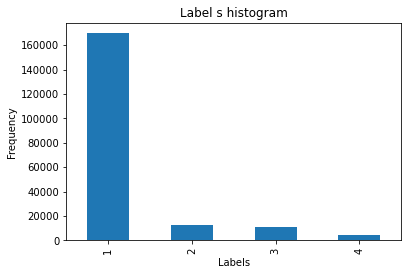

In [237]:
pd.value_counts(df_sample_1['LABEL']).plot.bar()
plt.title('Label s histogram')
plt.xlabel('Labels')
plt.ylabel('Frequency')
df_sample_1['LABEL'].value_counts()

In [238]:
df_sample_1 = pd.read_csv('df_sample_1_balanced.csv')

In [239]:
sorted(Counter(df_sample_1['LABEL']).items())

[(1, 500000), (2, 500000), (3, 500000), (4, 500000)]

1    500000
2    500000
3    500000
4    500000
Name: LABEL, dtype: int64

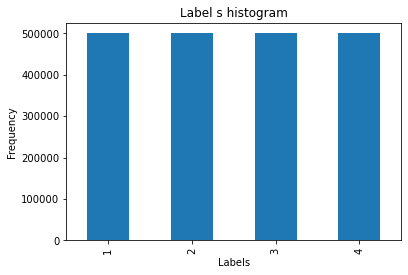

In [240]:
pd.value_counts(df_sample_1['LABEL']).plot.bar()
plt.title('Label s histogram')
plt.xlabel('Labels')
plt.ylabel('Frequency')
df_sample_1['LABEL'].value_counts()

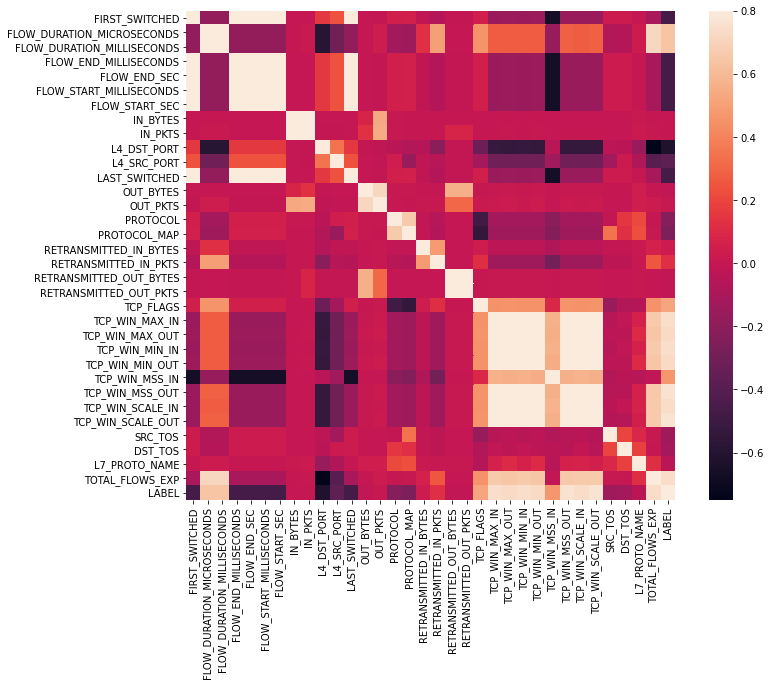

In [257]:
# Matriz de correlación:

corrmat = df_sample_1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


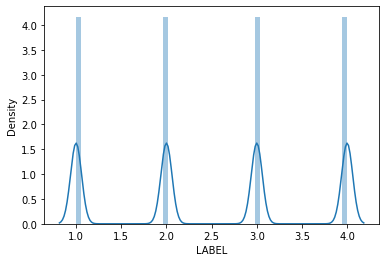

In [253]:
import seaborn as sns
sns.distplot(df_sample_1['LABEL']);

In [255]:
# Asimetría y curtosis:

print("Skewness: %f" % df_sample_1['LABEL'].skew())
print("Kurtosis: %f" % df_sample_1['LABEL'].kurt())

Skewness: 0.000000
Kurtosis: -1.360000


In [291]:
# ---

In [256]:
# Asimetría y curtosis:

print("Skewness: %f" % df_sample_1['L7_PROTO_NAME'].skew())
print("Kurtosis: %f" % df_sample_1['L7_PROTO_NAME'].kurt())

Skewness: 15.737485
Kurtosis: 336.533430


In [283]:
corr = df_sample_1.corr()
corr[['LABEL']].sort_values(by = 'LABEL',ascending = False).style.background_gradient()

,LABEL
LABEL,1.000000
TCP_WIN_SCALE_OUT,0.767661
TCP_WIN_MSS_OUT,0.760545
TCP_WIN_MIN_IN,0.750071
TCP_WIN_MAX_IN,0.749467
TOTAL_FLOWS_EXP,0.744745
TCP_WIN_SCALE_IN,0.742048
TCP_WIN_MAX_OUT,0.729439
TCP_WIN_MIN_OUT,0.729283
FLOW_DURATION_MICROSECONDS,0.639020


In [289]:
corr = df_sample_1.corr()
corr[['PROTOCOL_MAP']].sort_values(by = 'PROTOCOL_MAP',ascending = False).style.background_gradient()

,PROTOCOL_MAP
PROTOCOL_MAP,1.000000
PROTOCOL,0.665930
SRC_TOS,0.343913
L7_PROTO_NAME,0.227347
DST_TOS,0.122497
FLOW_START_SEC,0.059810
FIRST_SWITCHED,0.059810
FLOW_START_MILLISECONDS,0.059810
LAST_SWITCHED,0.059808
FLOW_END_SEC,0.059808


In [290]:
#df_sample_1.info()

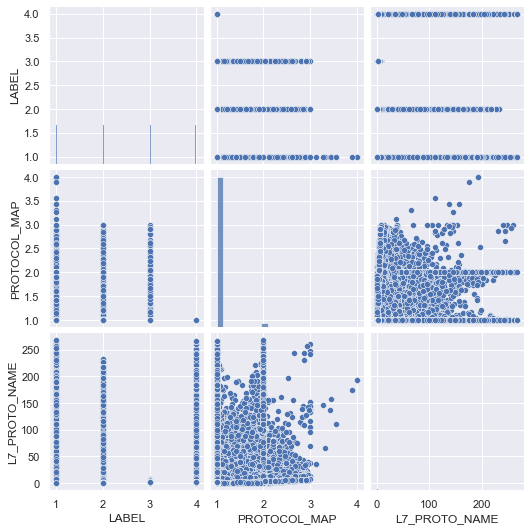

In [288]:
# Scatter plot:

sns.set()
cols = ['LABEL', 'PROTOCOL_MAP', 'L7_PROTO_NAME']
sns.pairplot(df_sample_1[cols], height = 2.5)
plt.show();

## Métricas de evaluación

In [ ]:
#Métricas de evaluación

## Gráfica de la curva ROC

---

In [ ]:
#Gráfica de la curva ROC

## Evaluación cruzada

---

In [ ]:
#Evaluación cruzada

## Conclusiones

---